In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing  import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r"D:\Machine Learning\Multiveriate Regression\Datasets\cars.xls")
df.head(10)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
5,15709.052821,22236,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
6,15230.003390,22576,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
7,15048.042184,22964,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
8,14862.093870,24021,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
9,15295.018267,27325,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1


In [8]:
df.shape

(804, 12)

In [9]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,804.0,21343.143767,9884.852801,8638.930895,14273.07387,18024.995019,26717.316636,70755.466717
Mileage,804.0,19831.934080,8196.319707,266.000000,14623.50000,20913.500000,25213.000000,50387.000000
Cylinder,804.0,5.268657,1.387531,4.000000,4.00000,6.000000,6.000000,8.000000
Liter,804.0,3.037313,1.105562,1.600000,2.20000,2.800000,3.800000,6.000000
Doors,804.0,3.527363,0.850169,2.000000,4.00000,4.000000,4.000000,4.000000
Cruise,804.0,0.752488,0.431836,0.000000,1.00000,1.000000,1.000000,1.000000
Sound,804.0,0.679104,0.467111,0.000000,0.00000,1.000000,1.000000,1.000000
Leather,804.0,0.723881,0.447355,0.000000,0.00000,1.000000,1.000000,1.000000


In [12]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
cat_col = df.select_dtypes(include='object').columns
num_col = df.select_dtypes(include=np.number).columns.tolist()
print(cat_col)
print(num_col)

Index(['Make', 'Model', 'Trim', 'Type'], dtype='object')
['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']


Price


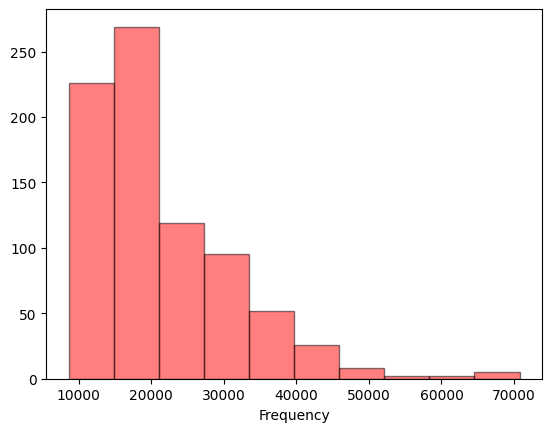

Mileage


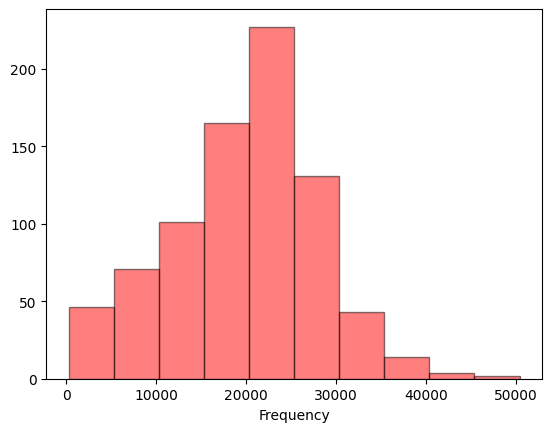

Cylinder


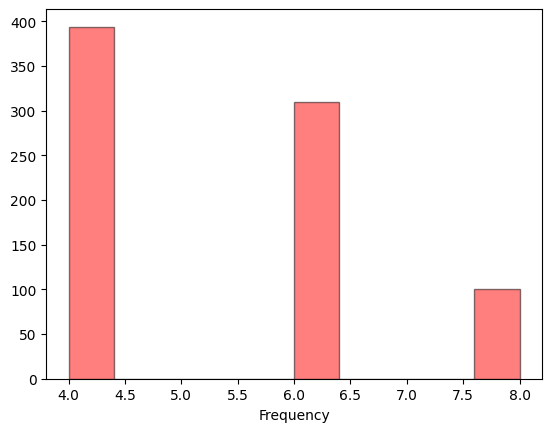

Liter


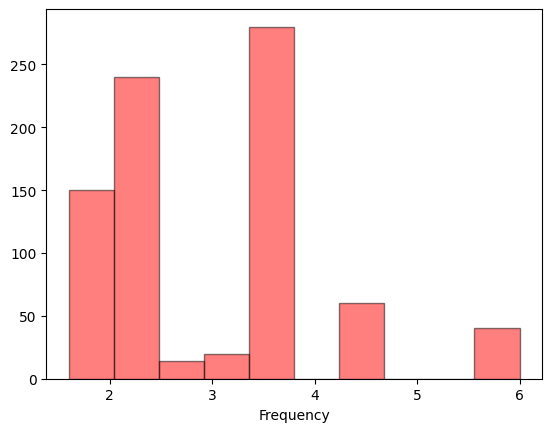

Doors


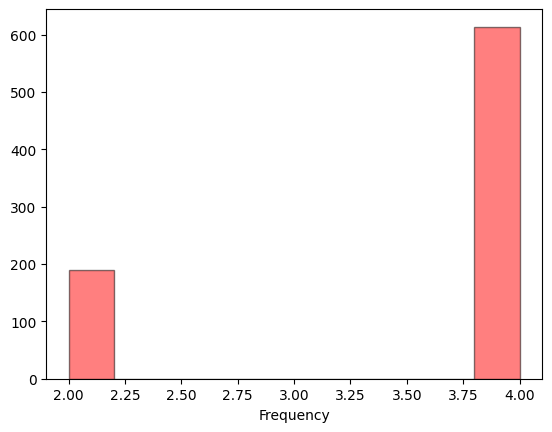

Cruise


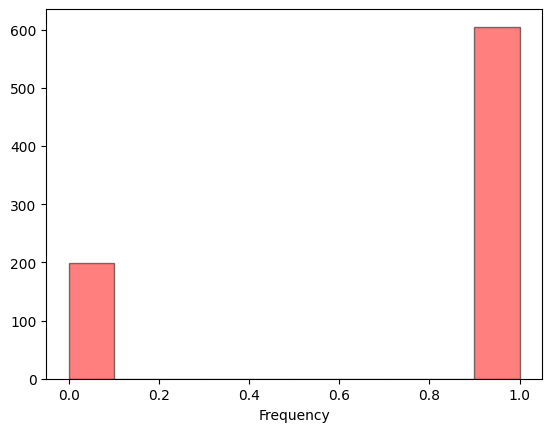

Sound


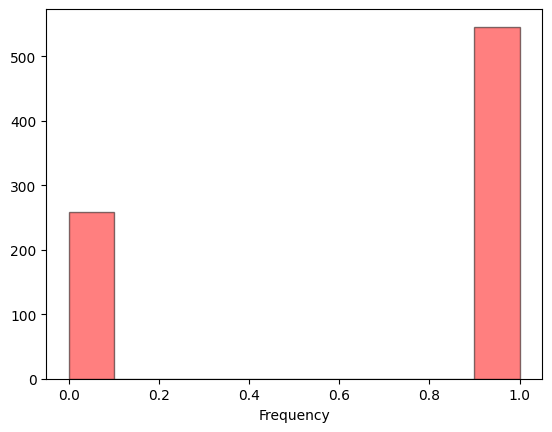

Leather


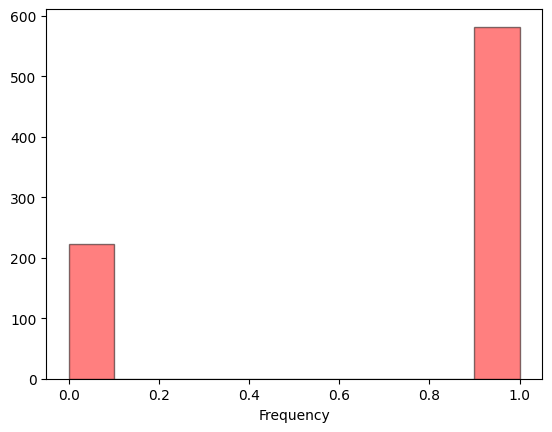

In [15]:
for col in num_col:
    print(col)
    plt.figure()
    plt.subplot(1,1,1)
    df[col].hist(bins=10, alpha=0.5, color='red', edgecolor='black', grid=False)
    plt.xlabel('Frequency')
    plt.show()

In [16]:
sns.color_palette('Greens_r')

[(0.017762399077277974, 0.44267589388696654, 0.18523644752018453),
 (0.17139561707035755, 0.581514801999231, 0.2979008073817762),
 (0.3388235294117647, 0.7117262591311034, 0.40584390618992694),
 (0.5573241061130334, 0.8164244521337947, 0.546958861976163),
 (0.7371472510572856, 0.895517108804306, 0.7108342945021145),
 (0.8828143021914648, 0.9546943483275664, 0.8621914648212226)]

Make


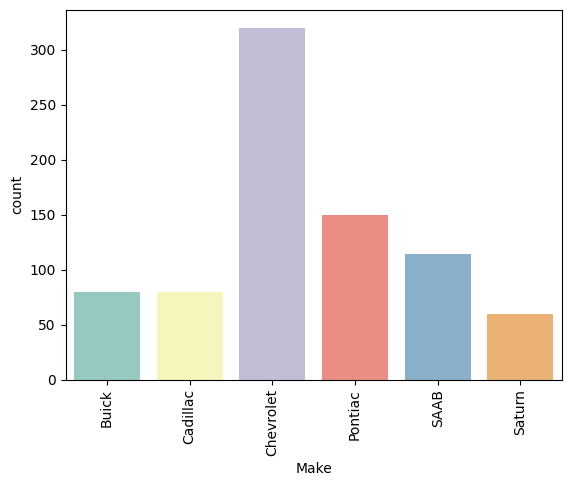

Model


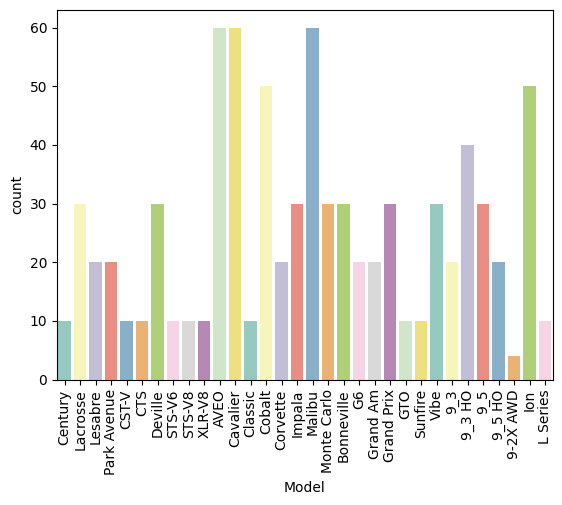

Trim


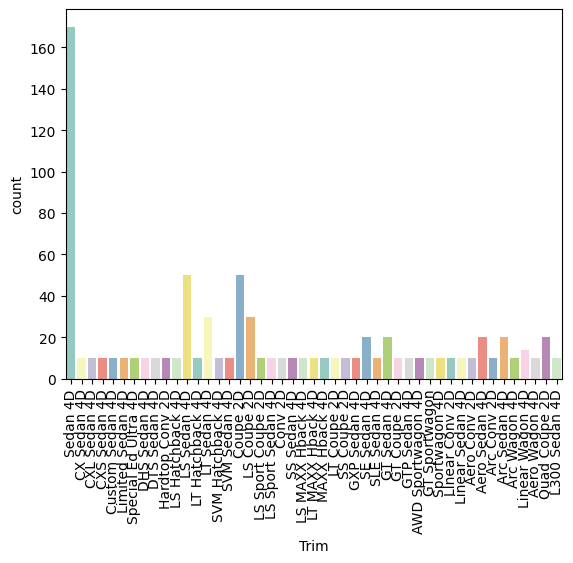

Type


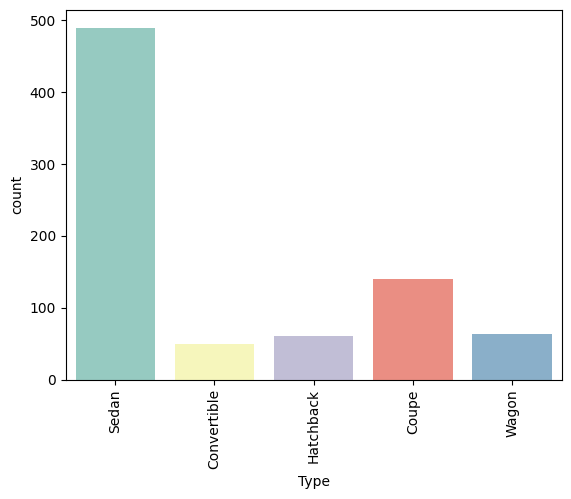

In [17]:
for col in cat_col:
    print(col)
    plt.figure()
    plt.subplot(1,1,1)
    sns.countplot(x=col, data=df, palette="Set3")
    plt.xticks(rotation=90)
    plt.show()

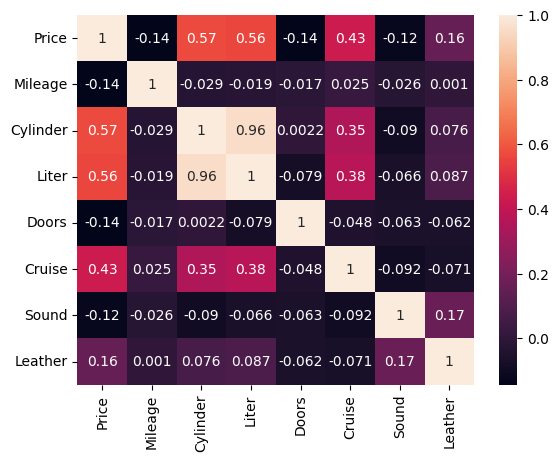

In [18]:
corr=df[num_col].corr()
sns.heatmap(corr,annot=True)
plt.show()

In [19]:
df.groupby('Cylinder').agg({'Price':'mean'}).reset_index().sort_values(by='Price', ascending=False)

,Cylinder,Price
2,8,38968.043180
1,6,20081.395841
0,4,17862.564874


In [20]:
df.groupby('Liter').agg({'Price':'mean'}).reset_index().sort_values(by='Price', ascending=False)

,Liter,Price
13,4.6,39535.972594
15,6.0,39155.712375
14,5.7,37076.585744
6,2.8,30455.144774
2,2.0,29968.972727
4,2.3,29288.283553
11,3.6,26150.134403
5,2.5,24960.948265
12,3.8,20158.316888
10,3.5,17788.263153


In [21]:
df.groupby('Doors').agg({'Price':'mean'}).reset_index().sort_values(by='Price', ascending=False)

,Doors,Price
0,2,23807.135520
1,4,20580.670749


In [22]:
df.groupby('Doors').agg({'Mileage':'mean'}).reset_index().sort_values(by='Mileage', ascending=False)

,Doors,Mileage
0,2,20081.442105
1,4,19754.724756


In [23]:
df.groupby('Cylinder').agg({'Mileage':'mean'}).reset_index().sort_values(by='Mileage', ascending=False)

,Cylinder,Mileage
0,4,20108.233503
2,8,19575.330000
1,6,19563.541935


In [24]:
df.groupby('Make').agg({'Price':'mean'}).reset_index().sort_values(by='Price', ascending=False)

,Make,Price
1,Cadillac,40936.335448
4,SAAB,29494.704687
0,Buick,20815.113883
3,Pontiac,18412.100422
2,Chevrolet,16427.599348
5,Saturn,13978.807560


In [25]:
df.groupby('Make').agg({'Mileage':'mean'}).reset_index().sort_values(by='Mileage', ascending=False)

,Make,Mileage
4,SAAB,20964.122807
0,Buick,20428.100000
5,Saturn,20335.750000
2,Chevrolet,19655.587500
3,Pontiac,19320.660000
1,Cadillac,18908.562500


In [26]:
df.groupby('Type').agg({'Price':'mean'}).reset_index().sort_values(by='Price', ascending=False)

,Type,Price
0,Convertible,40831.705847
4,Wagon,22859.245356
3,Sedan,21067.927487
1,Coupe,17726.931831
2,Hatchback,14170.927809


In [27]:
df.groupby('Make').agg({'Mileage':'mean'}).reset_index().sort_values(by='Mileage', ascending=False)

,Make,Mileage
4,SAAB,20964.122807
0,Buick,20428.100000
5,Saturn,20335.750000
2,Chevrolet,19655.587500
3,Pontiac,19320.660000
1,Cadillac,18908.562500


In [28]:
df.groupby('Leather')['Sound'].mean()

Leather
0    0.554054
1    0.726804
Name: Sound, dtype: float64

In [29]:
X = df[['Mileage', 'Cylinder', 'Liter', 'Doors']]
y = df['Price']

In [30]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
est = sm.OLS(y, X_scaled).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.064
Model:                            OLS   Adj. R-squared (uncentered):              0.059
Method:                 Least Squares   F-statistic:                              13.57
Date:                Tue, 31 Dec 2024   Prob (F-statistic):                    1.04e-10
Time:                        13:54:32   Log-Likelihood:                         -9207.1
No. Observations:                 804   AIC:                                  1.842e+04
Df Residuals:                     800   BIC:                                  1.844e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1275.2178    805.476     -1.583      0.114   -2856.315     305.879
x2          5251.9235   2915.177      1.802      0.072    -470.375     1.1e+04
x3           350.1174   2923.691      0.120      0.905   -5388.894    6089.128
x4         -1376.1100    839.085     -1.640      0.101   -3023.178     270.958
==============================================================================
Omnibus:                      160.986   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              265.567
Skew:                           1.291   Prob(JB):                     2.15e-58
Kurtosis:                       4.125   Cond. No.                         7.13
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Extract coefficients from the regression results
coefficients = est.params
coefficients

x1   -1275.217764
x2    5251.923474
x3     350.117397
x4   -1376.109958
dtype: float64

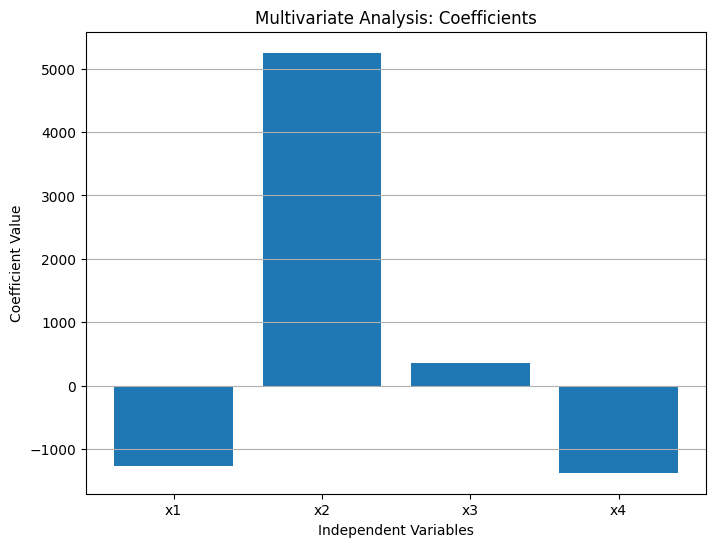

In [33]:
# Plot the coefficients
plt.figure(figsize=(8, 6))
plt.bar(coefficients.index, coefficients.values)
plt.xlabel('Independent Variables')
plt.ylabel('Coefficient Value')
plt.title('Multivariate Analysis: Coefficients')
plt.grid(axis='y')
plt.show()

**Data Splitting:**

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- This line splits the dataset into training and test sets.
- X represents the input features (independent variables), and y represents the target variable (dependent variable).
- The test_size parameter specifies the proportion of data to allocate for the test set (20% in this case).
- random_state ensures reproducibility by fixing the random seed.

**Model Initialization and Training:**

- model = LinearRegression()
    - Creates an instance of the linear regression model.
    - Linear regression assumes a linear relationship between input features and the target variable.

- model.fit(X_train, y_train)
    - Fits the model to the training data.
    - The model learns the coefficients (slope and intercept) that best fit the training data.

**Prediction:**

- y_train_pred = model.predict(X_train)
    - Predicts the target variable (y) for the training data.
    - y_train_pred contains the predicted values for the training set.
- y_test_pred = model.predict(X_test)

    - Predicts the target variable for the test data.
    - y_test_pred contains the predicted values for the test set.


**Model Evaluation:**

**Root Mean Squared Error (RMSE):**

- RMSE measures the average deviation between actual and predicted values.
- It quantifies the model’s prediction accuracy.

where:
    - (n) is the number of data points.
    - (y_i) is the actual target value.
    - (\hat{y}_i) is the predicted target value.


- train_rmse and test_rmse represent RMSE for the training and test sets, respectively.


**R-squared (Coefficient of Determination):**

- Measures the proportion of variance in the target variable explained by the model.
- Ranges from 0 to 1 (higher values indicate better fit).
- Calculated as:R2=1−SSR/SSRT

where:
    - SSR (Sum of Squared Residuals) represents the sum of squared differences between predicted and actual values.
    - SST (Total Sum of Squares) represents the sum of squared differences between actual values and the mean.

- r2_train and r2_test represent R-squared for the training and test sets, respectively.

In [34]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [35]:
#Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
#Evaluate the model
y_pred = model.predict(X_test)
y_pred

array([16537.73804838, 14612.68039568, 14423.29328419, 25008.72760498,
       27342.578308  , 13049.26156221, 13555.69686192, 14789.82905354,
       13625.85828313, 16160.02798804, 22768.08288909, 15318.00796296,
       18395.86284383, 24293.23160305, 15485.5146605 , 23382.01115713,
       23583.5991586 , 31536.46947117, 18519.26782104, 20174.11867883,
       21059.52668272, 22678.75360882, 21791.83009526, 14978.21199403,
       21747.08583901, 23959.45842382, 25611.65202825, 21456.96471842,
       15206.71584913, 22348.9836633 , 14414.59550324, 25402.34967419,
       16732.47906402, 17084.68393279, 25065.98560867, 24055.95876138,
       17963.70657529, 23649.52130126, 23266.79822921, 15467.68065089,
       22919.35350631, 17034.91059259, 16841.22346219, 23013.3061282 ,
       18117.68414039, 17737.71212346, 21120.27658144, 21971.12558472,
       23316.88517562, 22323.66573894, 25351.87305771, 28911.64147509,
       13354.04886883, 20281.178038  , 21803.75100132, 17724.38053563,
      

In [37]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 60583472.9695549
R-squared: 0.2361650012082357


In [38]:
# Interpret the results
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-1304.30636038  6920.69315556 -1195.48607621 -1602.53662787]
Intercept: 21376.925718361024


<Axes: xlabel='Price', ylabel='Density'>

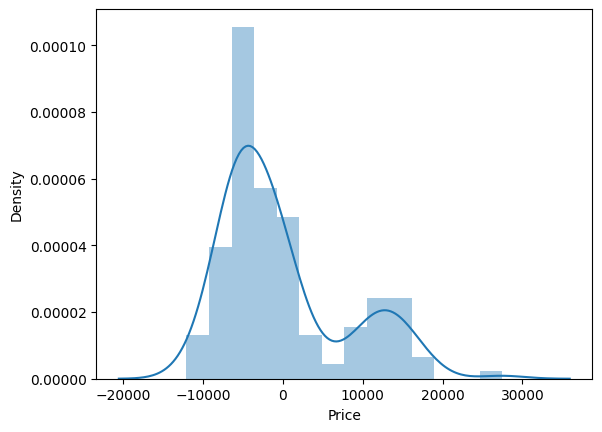

In [41]:
residuals = y_test - y_pred
sns.distplot(residuals)

Text(0.5, 1.0, 'Actual vs Predicted Prices')

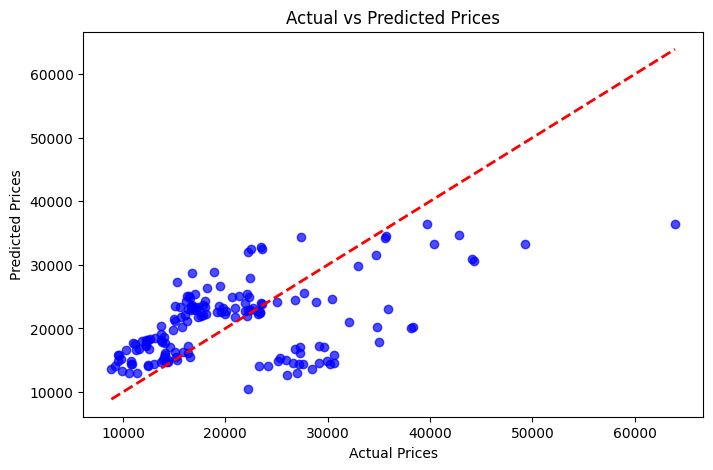

In [45]:
plt.figure(figsize=(8, 5))

plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')

- The red dashed line represents the ideal scenario where the predicted prices perfectly match the actual prices. Points closer to this line indicate better predictions.
- The red horizontal line represents zero residuals. Ideally, the residuals should be randomly scattered around this line, indicating that the model's errors are evenly distributed and there are no obvious patterns.

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [44]:
# Feature Engineering
# Add polynomial features and interaction terms
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [45]:
# Model Tuning
# Initialize models
linear_model = make_pipeline(StandardScaler(), LinearRegression())
ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
lasso_model = make_pipeline(StandardScaler(), Lasso(alpha=0.1))

- make_pipeline: This creates a pipeline that standardizes the features and then applies the regression model.
- StandardScaler: This scales the features to have zero mean and unit variance, which is important for models like Ridge and Lasso that are sensitive to the scale of the input data.
- LinearRegression: A simple linear regression model without regularization.
- Ridge(alpha=1.0): A linear regression model with L2 regularization (Ridge regression) to prevent overfitting. The alpha parameter controls the strength of the regularization.
- Lasso(alpha=0.1): A linear regression model with L1 regularization (Lasso regression) to prevent overfitting. The alpha parameter controls the strength of the regularization.

In [46]:
# Cross-validation
# Perform cross-validation
linear_cv_scores = cross_val_score(linear_model, X_poly, y, cv=5, scoring='r2')
ridge_cv_scores = cross_val_score(ridge_model, X_poly, y, cv=5, scoring='r2')
lasso_cv_scores = cross_val_score(lasso_model, X_poly, y, cv=5, scoring='r2')

- cross_val_score: This function performs cross-validation on the given model and dataset.
- cv=5: This specifies that 5-fold cross-validation should be used. The data is split into 5 parts, and the model is trained and validated 5 times, each time using a different part as the validation set and the rest as the training set.
- scoring='r2': This specifies that the R² score should be used to evaluate the model. R² measures how well the model explains the variability of the target variable.

In [43]:
# Calculate mean and standard deviation of cross-validation scores
linear_mean = np.mean(linear_cv_scores)
linear_std = np.std(linear_cv_scores)
ridge_mean = np.mean(ridge_cv_scores)
ridge_std = np.std(ridge_cv_scores)
lasso_mean = np.mean(lasso_cv_scores)
lasso_std = np.std(lasso_cv_scores)

# Display the results
{
    "Linear Regression R2 Mean": linear_mean,
    "Linear Regression R2 Std": linear_std,
    "Ridge Regression R2 Mean": ridge_mean,
    "Ridge Regression R2 Std": ridge_std,
    "Lasso Regression R2 Mean": lasso_mean,
    "Lasso Regression R2 Std": lasso_std
}

{'Linear Regression R2 Mean': -5.809624624120572,
 'Linear Regression R2 Std': 10.986664184436918,
 'Ridge Regression R2 Mean': -6.213118987981302,
 'Ridge Regression R2 Std': 11.50195663296501,
 'Lasso Regression R2 Mean': -6.017336280941917,
 'Lasso Regression R2 Std': 11.218850909734993}

All three models (linear, ridge, and lasso regression) demonstrate negative mean R² scores, indicating that they do not perform well on the given dataset. The high standard deviations across all models suggest that their performance is highly variable, possibly due to the small sample size or the nature of the features.